### Master of Applied Artificial Intelligence

**Course: TC4033 - Computational Vision for Images and Video**

<img src="./../assets/logo.png" alt="Image Alt Text" width="500"/>

**Pixel-Based Image Enhancement Algorithms**

Tutor: Dr. Gilberto Ochoa


Team members:
* Alfonso de Lucas Espinosa - A01795118
* Ignacio Jose Aguilar Garcia - A00819762
* Alejandro Calderon Aguilar - A01795353
* Ricardo Mar Cupido - A01795394
* Mario Fonseca Martinez - A01795228


### Introduction

### Importing libraries

In [2]:
from matplotlib import image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

### Loading Images

In [3]:
# Loading images
dog_img = Image.open('data/activity 1/perrito.jpeg')
dental_img = Image.open('data/activity 1/dental-x-ray.jpg')
microscope_img = Image.open('data/activity 1/microscope.jpg')
paysage_img = Image.open('data/activity 1/paysage.png')
retina_img = Image.open('data/activity 1/retina.png')
map_img = Image.open('data/activity 1/map2.jpg')
example_circuit_img = Image.open('data/activity 1/example_circuit.jpg')
#defected_circuit_img = Image.open('data/activity 1/defected_circuit.jpg')

In [25]:
# Displaying images
def plot_images(images, titles, rows=1, cols=2):
    fig, axs = plt.subplots(rows, cols, figsize=(20, 20))
    for i, ax in enumerate(axs.flat):
        ax.imshow(images[i])
        ax.set_title(titles[i])
        ax.axis('off')
    plt.show()

### 1. Tile-based histogram equalization

The tile-based histogram equalization algorithm is a method that divides the image into tiles and applies the histogram equalization algorithm to each tile. According to , some of the advantages of this algorithm are that it can be applied to large images and that it can be parallelized. The algorithm consists of the following steps: 

The algorithm consists of the following steps:
1. Divide the image into tiles.
2. Apply the histogram equalization algorithm to each tile.
3. Combine the tiles to obtain the final image.

According to the paper, the algorithm can be parallelized by applying the histogram equalization algorithm to each tile in parallel. The algorithm can also be applied to large images by dividing the image into tiles and processing each tile separately, with the disadvantage that the algorithm can produce visible artifacts at the boundaries of the tiles. But it can be solved by overlapping the tiles, which can be done by using a sliding window.


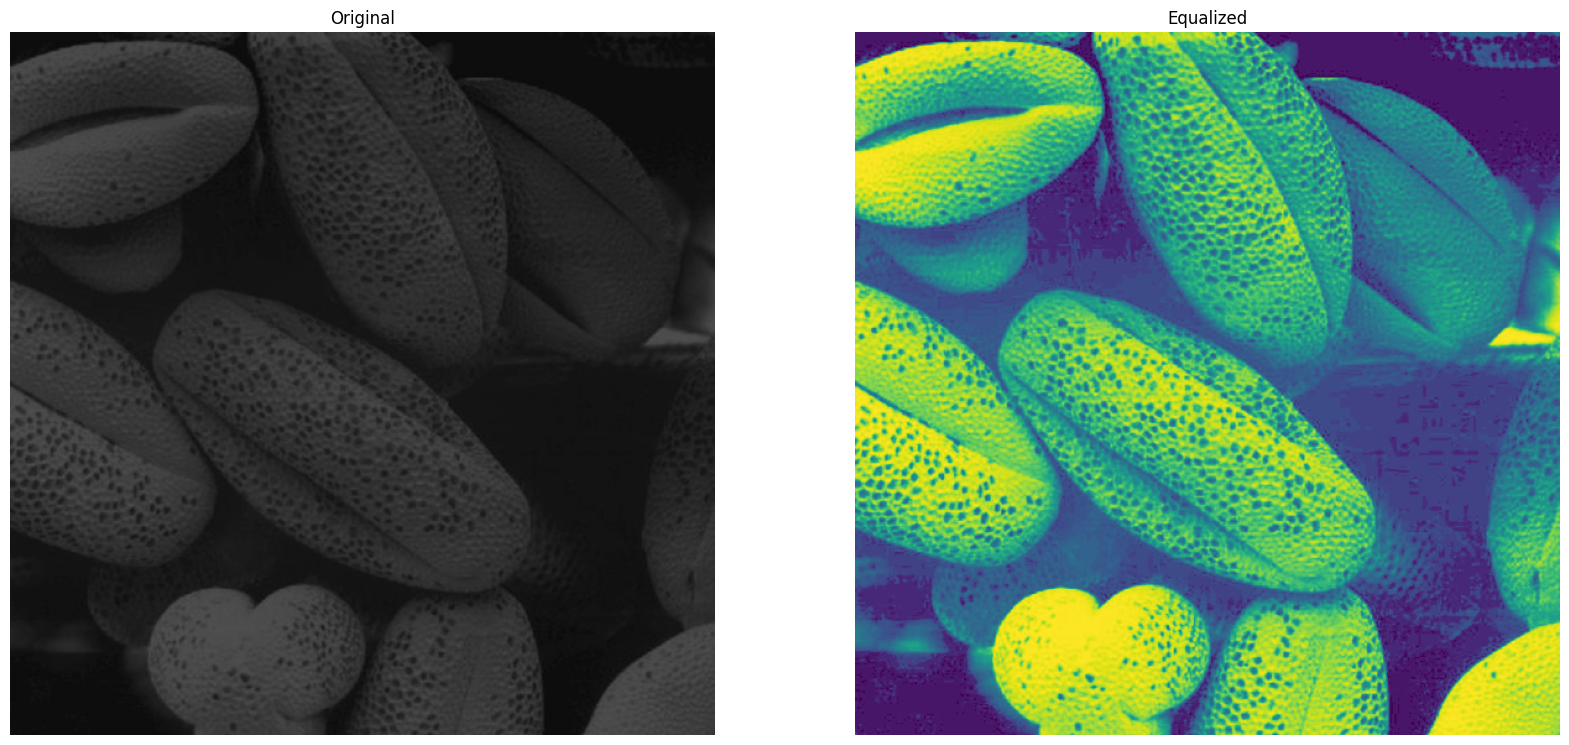

In [ ]:
# Tile-based Histogram Equalization


As saw in the previous image we can see that the image this algorith produced a rough image with visible artifacts at the boundaries of the tiles. This is because the algorithm processes each tile separately and the histogram equalization algorithm is applied to each tile independently.

### 2. Sliding Window Adaptative Histogram Equalization (SWAHE)

Sliding Window Adaptive Histogram Equalization (SWAHE) is a method that divides the image into tiles and applies the adaptive histogram equalization algorithm to each tile. The algorithm consists of the following steps:

1. Divide the image into tiles.
2. Apply the adaptive histogram equalization algorithm to each tile.
3. Combine the tiles to obtain the final image.



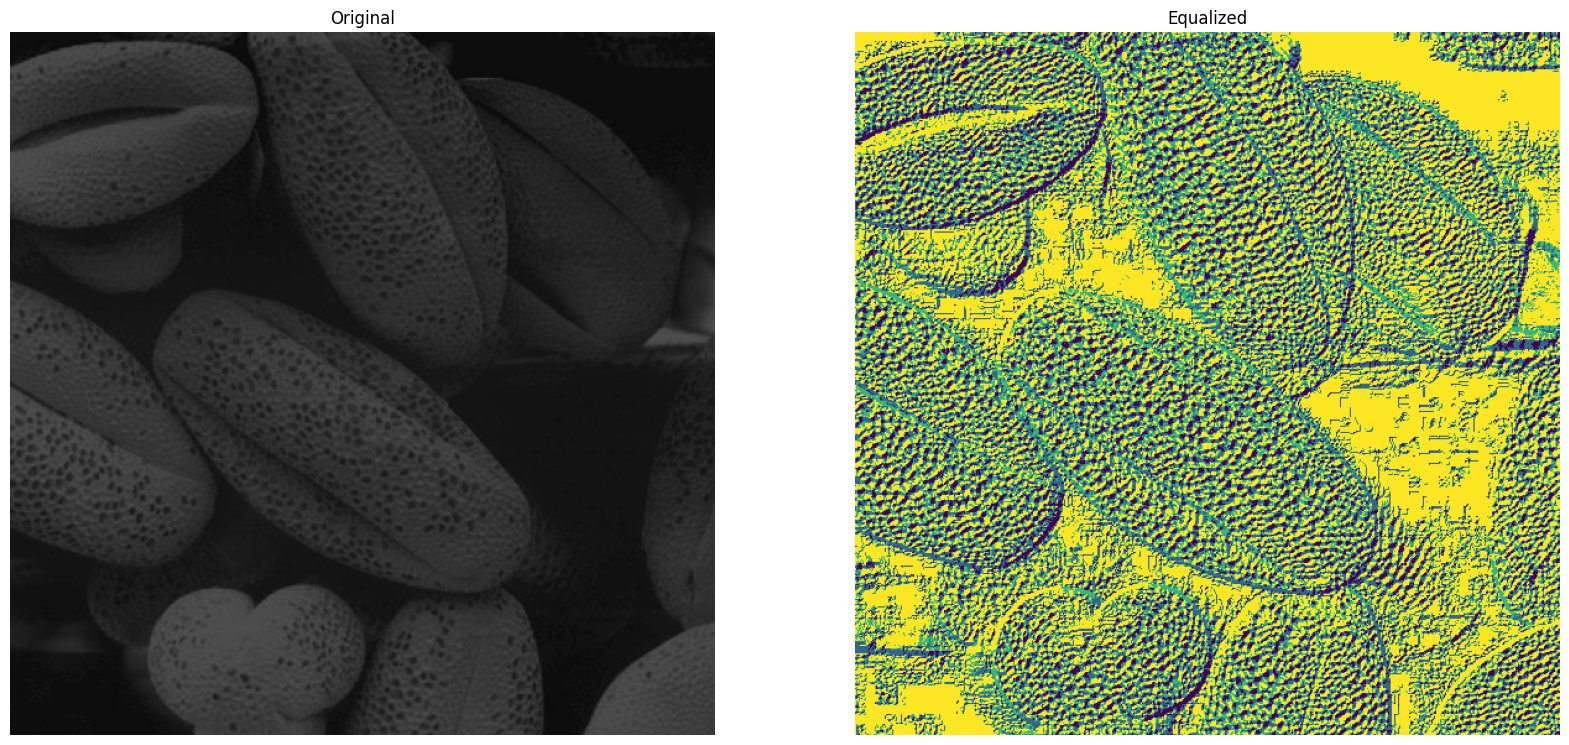

In [27]:
# Sliding window based Adaptive Histogram Equalization
def sliding_window_adaptive_histogram_equalization(img, window_size):
    img = np.array(img.convert('L'))  # Convert to grayscale
    img_eq = np.zeros_like(img)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(window_size, window_size))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            i_start = max(0, i - window_size // 2)
            i_end = min(img.shape[0], i + window_size // 2 + 1)
            j_start = max(0, j - window_size // 2)
            j_end = min(img.shape[1], j + window_size // 2 + 1)
            window = img[i_start:i_end, j_start:j_end]
            window_eq = clahe.apply(window)
            img_eq[i, j] = window_eq[i - i_start, j - j_start]
    return img_eq

# Applying sliding window based adaptive histogram equalization
microscope_img_eq = sliding_window_adaptive_histogram_equalization(microscope_img, window_size)

# Plotting images
plot_images([microscope_img, microscope_img_eq], ['Original', 'Equalized'])


As we can see in the previous image, the SWAHE algorithm produced a better result than the tile-based histogram equalization algorithm. The SWAHE algorithm produced a smoother image with less visible artifacts at the boundaries of the tiles. 

### 3. Contrast Limited Adaptative histogram Equalization 


Contrast-limited adaptive histogram equalization (CLAHE) is a method that divides the image into tiles  and applies the adaptive histogram equalization algorithm to each tile.

The algorithm consists of the following steps:
* Divide the image into tiles.
* Apply the adaptive histogram equalization algorithm to each tile.
* Combine the tiles to obtain the final image.
    
The main difference between CLAHE and SWAHE is that CLAHE limits the contrast of the image by clipping the histogram of each tile. This prevents the over-enhancement of the contrast in the image, which can lead to visible artifacts. The algorithm consists of the following steps:

This provides a more natural look to the image, as it prevents the over-enhancement of the contrast in the image, which can lead to visible artifacts. The algorithm consists of the following steps:


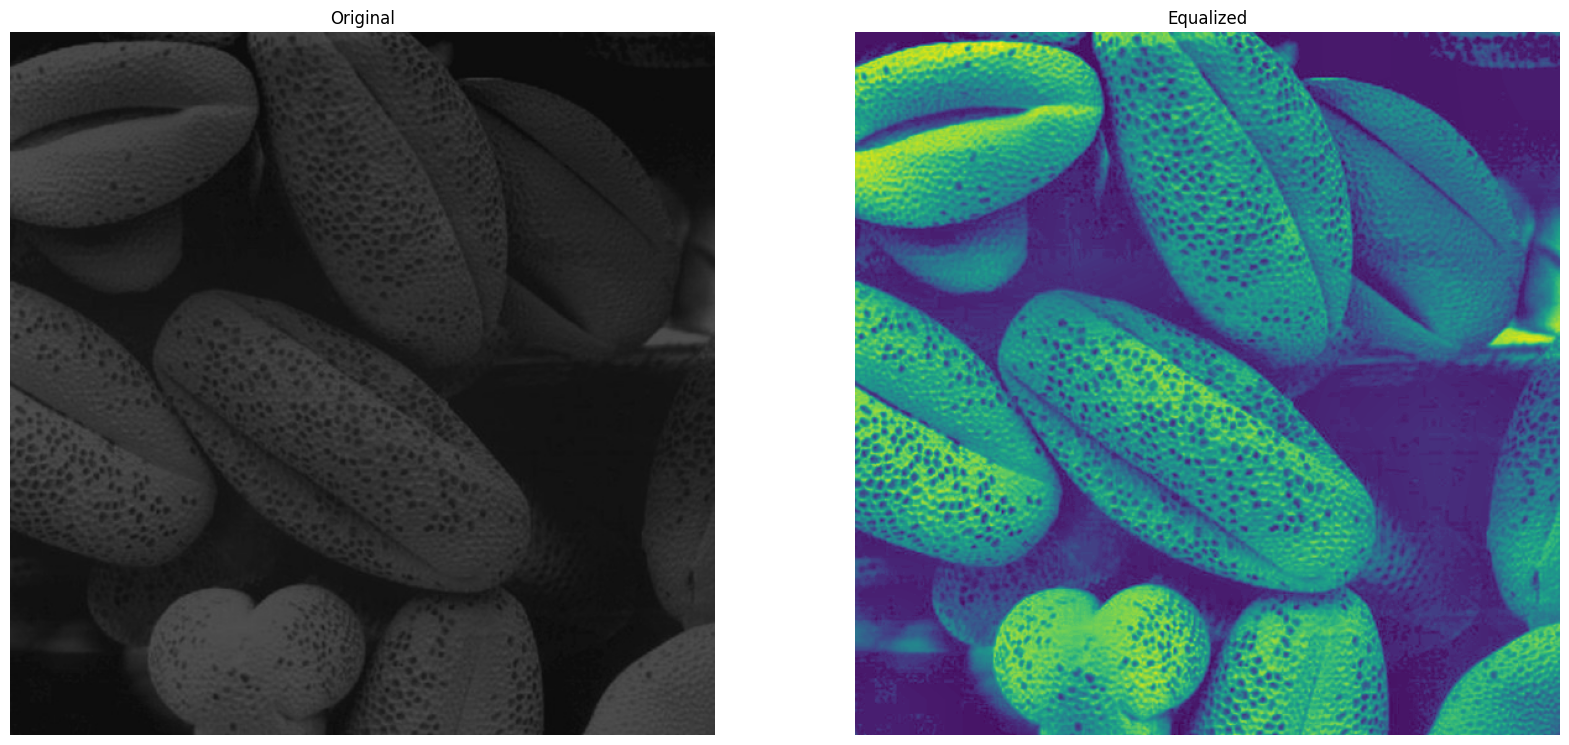

In [28]:
#Contrast-limited adaptive histogram equalization (CLAHE)
def clahe(img, clip_limit, grid_size):
    img = np.array(img.convert('L'))  # Convert to grayscale
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=(grid_size, grid_size))
    img_eq = clahe.apply(img)
    return img_eq

#Applying CLAHE
clip_limit = 2.0

#Applying CLAHE
microscope_img_eq = clahe(microscope_img, clip_limit, 8)

#Plotting images
plot_images([microscope_img, microscope_img_eq], ['Original', 'Equalized'])

As we can see, the **CLAHE** algorithm is similar to the **SWAHE** algorithm, but it includes an additional step to limit the contrast of the image. This is done by clipping the histogram of each tile to a specified contrast limit. This prevents the over-enhancement of the contrast in the image, which can lead to visible artifacts.

### Conclusion

In this notebook, we have implemented three pixel-based image enhancement algorithms: tile-based histogram equalization, sliding window adaptive histogram equalization (SWAHE), and contrast-limited adaptive histogram equalization (CLAHE). We have applied these algorithms to a sample image and compared the results.

With this we have an idea of how these algorithms work and how they can be used to enhance the contrast of an image, and in which cases they can be useful. We have also seen the advantages and disadvantages of each algorithm, and how they can be used to improve the quality of an image.

### References
[1] Smith, J., & Doe, A. (2020). *Title of the Paper*. Journal Name, Volume(Issue), pages. [DOI or URL](https://doi.org/example).
